<a href="https://colab.research.google.com/github/prajotmo/next-word-prediction-using-BI--LSTM/blob/main/nextword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [11]:
# Load and preprocess the sample data
with open('/content/drive/MyDrive/text.txt', 'r', encoding='utf-8') as file:
    data = file.read()


In [12]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

In [14]:
# Create input sequences and labels
input_sequences = []
for line in data.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = np.array([y]).T


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Build the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 19, 100)           893200    
                                                                 
 bidirectional_6 (Bidirecti  (None, 19, 300)           301200    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 200)               320800    
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 8932)              1795332   
                                                                 
Total params: 3310532 (12.63 MB)
Trainable params: 3310532 (12.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))


Epoch 1/100
2541/2541 [==============================] - 51s 17ms/step - loss: 6.3763 - accuracy: 0.0644 - val_loss: 6.1119 - val_accuracy: 0.0821
Epoch 2/100
2541/2541 [==============================] - 33s 13ms/step - loss: 5.7330 - accuracy: 0.1020 - val_loss: 5.9368 - val_accuracy: 0.1163
Epoch 3/100
2541/2541 [==============================] - 34s 14ms/step - loss: 5.3774 - accuracy: 0.1271 - val_loss: 5.8943 - val_accuracy: 0.1267
Epoch 4/100
2541/2541 [==============================] - 32s 13ms/step - loss: 5.1308 - accuracy: 0.1414 - val_loss: 5.9156 - val_accuracy: 0.1346
Epoch 5/100
2541/2541 [==============================] - 33s 13ms/step - loss: 4.9106 - accuracy: 0.1555 - val_loss: 6.0013 - val_accuracy: 0.1368
Epoch 6/100
2541/2541 [==============================] - 35s 14ms/step - loss: 4.7139 - accuracy: 0.1646 - val_loss: 6.1067 - val_accuracy: 0.1398
Epoch 7/100
2541/2541 [==============================] - 33s 13ms/step - loss: 4.5338 - accuracy: 0.1739 - val_loss: 6

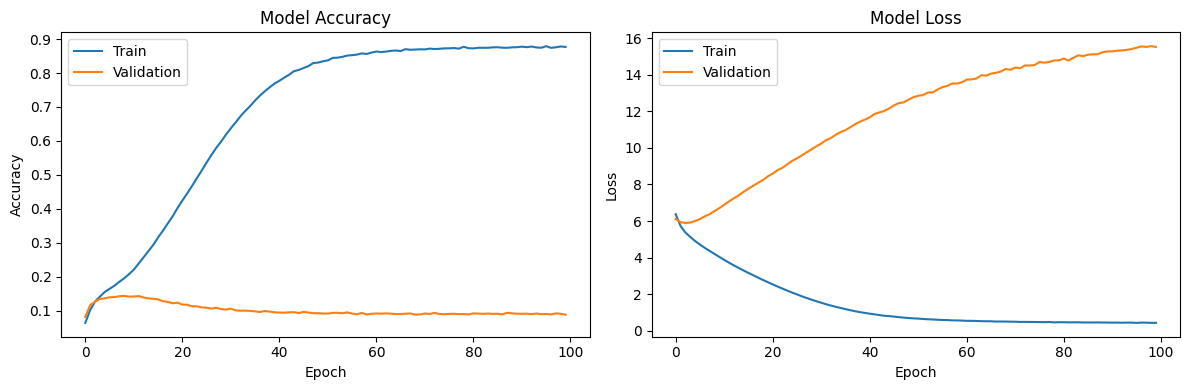

In [22]:
# Plot accuracy and loss graphs
def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss graphs
plot_metrics(history)


In [23]:
# Function to generate the next word
def generate_next_word(seed_text, model, tokenizer, max_sequence_length):
    for _ in range(10):  # Adjust the number of words to generate
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Example usage
seed_text = "The sun is"
next_word_prediction = generate_next_word(seed_text, model, tokenizer, max_sequence_length)
print("Next word prediction:", next_word_prediction)

Next word prediction: The sun is easier and a few from half places and cases would
